In [8]:
from model import KerasModel
from train_utils import *
import random
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [9]:
m = KerasModel("final_config")

In [10]:
m.guessing_model.load_weights("tensorflow_1000.h5") # This defines the RNN based model.

##### Generating Test Dataset

In [5]:
path = "/home/juggernautjha/Desktop/trexquant/rnn_testing/data/250k_test.txt"
words = [i.strip() for i in open(path).readlines()]
word_len = [len(i) for i in words]
words = [words[i] for i in np.argsort(word_len)]

In [11]:
def generate_stats_for_datset(path):
    words = [i.strip() for i in open(path).readlines()]
    word_len = [len(i) for i in words]
    words = [words[i] for i in np.argsort(word_len)]
    word_dict = {}
    for i in tqdm(words):
        if len(i) not in word_dict:
            word_dict[len(i)] = [i]
        else:
            word_dict[len(i)] += [i]
    X = [a for a,b in word_dict.items()]
    Y = [len(b) for _,b in word_dict.items()]
    plt.bar(X,Y)
    pth = f"{path.split('/')[-1].split('.')[0]}.pdf"
    plt.savefig(pth)
    plt.show()
    
    print(pth)
    
    return word_dict
    

  0%|          | 0/56825 [00:00<?, ?it/s]

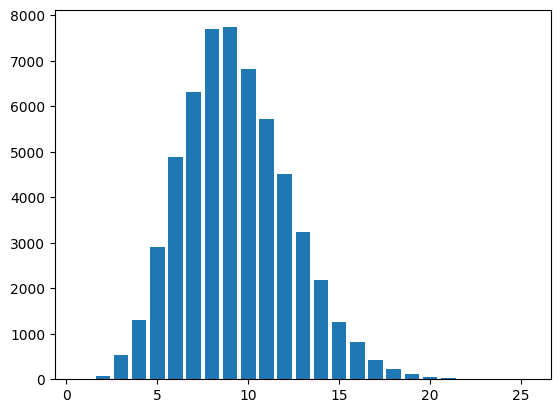

250k_test.pdf


In [12]:
word_dict = generate_stats_for_datset(path)

#### Testing Procedure
- Each approach will be tested on a dictionary of 50k words.
- I will record the following metrics
  Length of Word, Success, Number of Hits.
- Hopefully Graph them.
      

##### Testing the RNN Based Model

In [13]:
stats = {i : [] for i in word_dict
        }

In [ ]:
for length in word_dict:
    wins = 0
    plays = 0
    hits = 0
    progbar = tqdm(word_dict[length])
    for word in progbar:
        player = Trainer(word, m, verbose = False)
        _, w, won = player.play()
        if won:
            wins += 1
        plays += 1
        hits += w
        acc = wins/plays
        progbar.set_description("%.3f acc" %acc)
    stats[length] = [wins/plays, hits/plays]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/540 [00:00<?, ?it/s]